# FEA Lattice Band Example
<br>
<br>
<br>

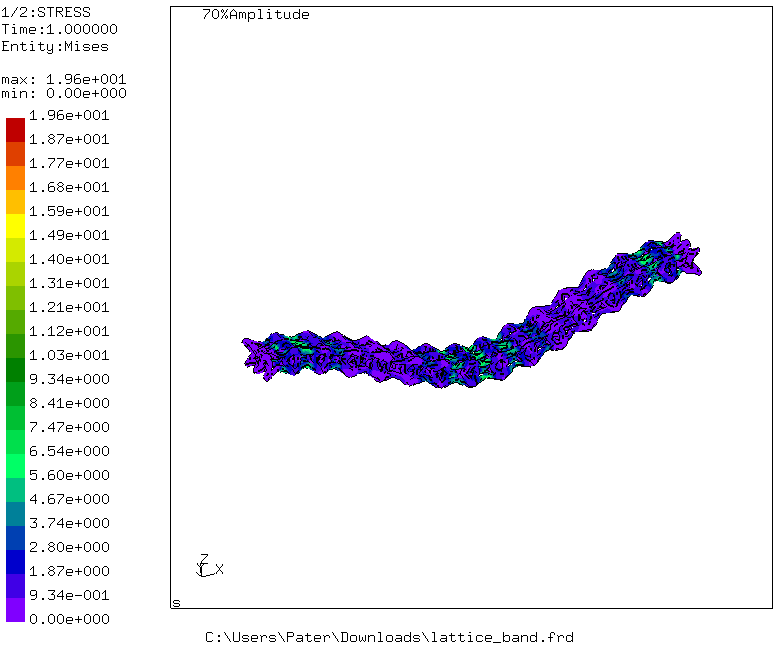

In [1]:
import genysis
token = "REPLACE_WITH_YOUR_TOKEN"

Welcome to GENYSIS


In [3]:
# # upload and visualize the geometry to run FEA on
genysis.upload('models/band.stp','band.stp',token) # NURBs surface used as base to generate our lattice geometry
genysis.upload('models/mid_load.obj','mid_load.obj',token) # a load region in the middle of band
genysis.upload('models/support1.obj','support1.obj',token) # a support region on one side of band
genysis.upload('models/support2.obj','support2.obj',token) # a support region on other side side of band
genysis.visualize(['band.stp','mid_load.obj','support1.obj','support2.obj'],token,True)  # visualize uploaded files

('uploading file size:', 0.005, 'MB')
[=====================================================]107%
successfully uploaded models/band.stp as band.stp
('uploading file size:', 0.0, 'MB')
[===========================================================================]150%
successfully uploaded models/mid_load.obj as mid_load.obj
('uploading file size:', 0.0, 'MB')
[==========================================================================]149%
successfully uploaded models/support1.obj as support1.obj
('uploading file size:', 0.0, 'MB')
[==========================================================================]149%
successfully uploaded models/support2.obj as support2.obj
https://studiobitonti.appspot.com/apps/visualize?name=band.stp,mid_load.obj,support1.obj,support2.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=band.stp,mid_load.obj,support1.obj,support2.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [7]:
# generate a simple surface lattice using "band.stp"
sl = genysis.surfaceLattice()
sl.setSurfaces('band.stp')
sl.setDivision(u=15,v=2,w=1)
sl.setHeight(5)
sl.genGrid(token)
genysis.genLatticeUnit(case=2,chamfer=0,centerChamfer=0,bendIn=0.5,cBendIn=0,connectPt=0,output="cell_0.obj",token=token)
sl.setComponent("cell_0.obj")
sl.setOutput("lattice_lines.obj")
sl.populateLattice(token)
genysis.visualize("lattice_lines.obj",token,True)

('request: ', '{"surfaces": "band.stp", "div_U": 15, "div_W": 1, "height": 5, "t": "REPLACE_WITH_YOUR_TOKEN", "output": "temp.json", "div_V": 2}')
('response: ', u'["temp.json"]\n')
('request: ', '{"case": 2, "cBendIn": 0, "chamfer": 0, "bendIn": 0.5, "centerChamfer": 0, "filename": "cell_0.obj", "t": "REPLACE_WITH_YOUR_TOKEN", "connectPt": 0}')
('response: ', u'["cell_0.obj"]')
('request: ', '{"EPSILON": 0.01, "component": "cell_0.obj", "filename": "lattice_lines.obj", "blendTargets": [], "boxes": "temp.json", "t": "REPLACE_WITH_YOUR_TOKEN"}')
('response: ', u'["lattice_lines.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=lattice_lines.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=lattice_lines.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [6]:
# mesh the lattice
genysis.marchingCube(
    lines="lattice_lines.obj",
    resolution=400,
    memberThickness=0.6,
    filename="lattice_band.stl",
#     preview=True, # set preview to False for final water-tight printable mesh
    token=token)

genysis.visualize("lattice_band.stl",token,True)

('request: ', '{"resolution": 400, "memberThickness": 0.6, "lines": "lattice_lines.obj", "t": "REPLACE_WITH_YOUR_TOKEN", "filename": "lattice_band.stl"}')
('response: ', u'["lattice_band.stl"]')
https://studiobitonti.appspot.com/apps/visualize?name=lattice_band.stl&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=lattice_band.stl&t=REPLACE_WITH_YOUR_TOKEN'

In [8]:
f = genysis.fea()
# set the geometry to run fea on
f.setVolume('lattice_band.stl')
# set the prefix of output files
f.setOutput('lattice_band')
# set the material properties
f.setMaterial(elastic_modulus = 100,poisson_ratio = 0.4)
# set the detail level of remeshing algorithm that turning the triangle-surface-mesh into volumetric-tetrahedron-mesh  
f.setRemesh(
    detail='normal'  # 'low' 'normal' 'high', default is 'normal'
)

# add the load region
f.addLoad(
    file='mid_load.obj', # use an uploaded obj file to define load region
    load={"x": 0,"y": 0,"z": -10} # the load vector which will be applied distributedly to this region
)

# add first support region
f.addSupport(
     file='support1.obj', # use an uploaded obj file to define load region
    axis={"x": True,"y": True,"z": True} # choose which axises to be constrained for this support node set
)

# add second support region
f.addSupport(
     file='support2.obj', # use an uploaded obj file to define load region
    axis={"x": True,"y": True,"z": True} # choose which axises to be constrained for this support node set
)


# kick-start the fea solver
f.run(token)

# two .frd and .inp files will be generated if the FEA was successful 
# .frd is the FEA result file while .inp is the input file of Calculix for reproduction and debuging purposes 
genysis.download('lattice_band.frd','models/lattice_band.frd',token)


('request: ', '{"input": ["lattice_band.stl", "mid_load.obj", "support1.obj", "support2.obj"], "setting": {"load_conditions": [{"load": {"y": 0, "x": 0, "z": -10}, "type": "cload", "condition": {"file": "mid_load.obj"}}], "remesh": {"detail": "normal", "fast": false}, "material": {"elastic_modulus": 100, "poisson_ratio": 0.4}, "output": "lattice_band", "input": "lattice_band.stl", "support_conditions": [{"condition": {"file": "support1.obj"}, "axis": {"y": true, "x": true, "z": true}}, {"condition": {"file": "support2.obj"}, "axis": {"y": true, "x": true, "z": true}}]}, "t": "REPLACE_WITH_YOUR_TOKEN", "output": "lattice_band"}')
('response: ', u'["lattice_band.inp","lattice_band.frd"]\n')
[==================================================]100%
successfully downloaded to models/lattice_band.frd


### Viewing the FEA result with Calculix
Genysis uses open-source FEA solver Calculix as backend. Currently it needs to be installed to view the result. 

We are also developing our own viewer which will be released in near future

For windows users, bconverged provides a handy installer
http://www.bconverged.com/data/content/CalculiX_2_10_win_002.zip

Installation for other platforms and further details please refer to http://www.calculix.de/


For unit conversion please refer to http://web.mit.edu/calculix_v2.7/CalculiX/ccx_2.7/doc/ccx/node4.html

<br>

#### After installing calculix, you will be able to open .frd files and use its GUI to visualize the FEA results:

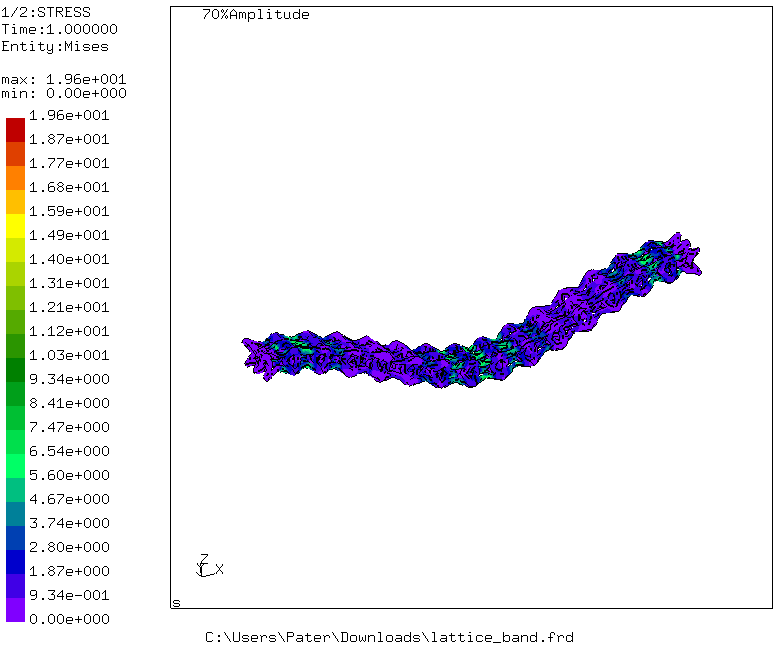